# Project-3a

In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of regression models.

First, run the following block to set up the variables needed for later sections.

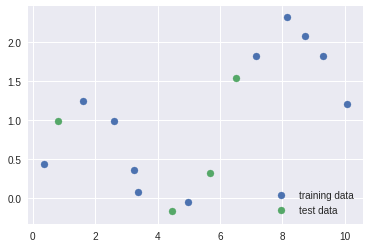

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
    
part1_scatter()

### Question 1

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

<img src="polynomialreg1.png" style="width: 1000px;"/>

The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).

<br>
*This function should return a numpy array with shape `(4, 100)`*

In [0]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    res=np.eye(4,100)
    for i, degree in enumerate([1,3,6,9]):
      poly = PolynomialFeatures(degree=degree)
      X_train_poly = poly.fit_transform(X_train.reshape(X_train.size, 1))

      linreg = LinearRegression().fit(X_train_poly, y_train)
      res[i,:] = linreg.predict(poly.fit_transform(np.linspace(0,10,100).reshape(100,1)))

    return res
  
answer_one()

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

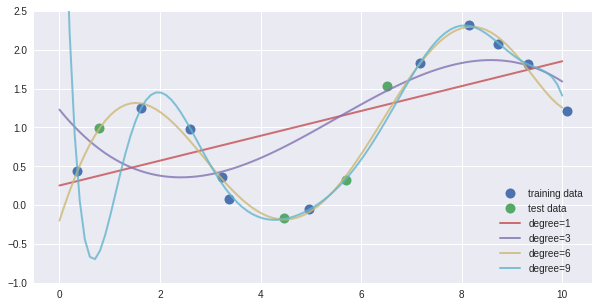

In [0]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

### Question 2

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the MSE (mean squared error) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(mse_train, mse_test)`. Both arrays should have shape `(10,)`*

In [0]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import mean_squared_error
    
    mse_train = np.zeros(10)
    mse_test = np.zeros(10)
    
    for i in np.arange(0, 10, 1):
      poly = PolynomialFeatures(degree=i)
      X_train_poly = poly.fit_transform(X_train.reshape(X_train.size, 1))
      linreg = LinearRegression().fit(X_train_poly, y_train)
      y_pred=linreg.predict(X_train_poly)
      
      X_test_poly = poly.fit_transform(X_test.reshape(X_test.size, 1))
      y_pred1=linreg.predict(X_test_poly)
      mse_train[i] = mean_squared_error(y_train, y_pred)
      mse_test[i] = mean_squared_error(y_test, y_pred1)
    return (mse_train, mse_test)
answer_two()

(array([0.62681659, 0.35775822, 0.34405975, 0.25875018, 0.05050923,
        0.01517748, 0.00615388, 0.00405858, 0.00227193, 0.0012304 ]),
 array([0.61789087, 0.60714096, 0.44669888, 0.41580577, 0.11284861,
        0.05138352, 0.03285357, 0.03335285, 0.15363618, 0.68777256]))

### Question 3

Based on the MSE scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

Hint: Try plotting the MSE scores from question 2 to visualize the relationship between degree level and MSE.

*This function should return one tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`. There might be multiple correct solutions, however, you only need to return one possible solution, for example, (1,2,3).* 

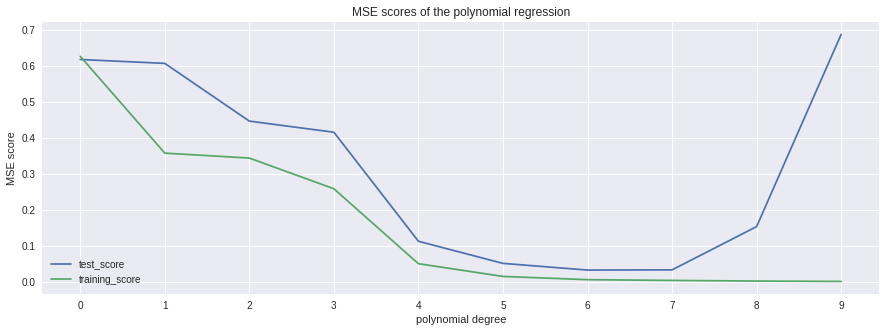

In [0]:
def plot_three():
    import matplotlib.pyplot as plt
    %matplotlib inline
    mse_scores = answer_two()
    df = pd.DataFrame({'training_score':mse_scores[0], 'test_score':mse_scores[1]})
    pl = df.plot(title= 'MSE scores of the polynomial regression', figsize =(15,5), xticks=df.index)
    pl.set_ylabel("MSE score")
    pl.set_xlabel("polynomial degree")

plot_three()

In [0]:
def answer_three():
    return (1,9,6)
  
answer_three()

(1, 9, 6)

### Question 4

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Ridge Regression model (with hyperparameter `max_iter=10000`, and hyperparameter `alpha` chosen through cross-validation) both on polynomial features of degree 12. Return the MSE score for both the LinearRegression and Ridge model's test sets.

*This function should return one tuple `(LinearRegression_MSE_test, Ridge_MSE_test)`*

In [0]:
def best_alpha():
  
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.linear_model import Ridge, LinearRegression
  from sklearn.model_selection import GridSearchCV
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()

  alphas = np.array([100, 50, 20, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.001, 0.0001, 0])
  poly = PolynomialFeatures(degree=12)
  X_train_poly = scaler.fit_transform(poly.fit_transform(X_train.reshape(X_train.size, 1)))

  grid = GridSearchCV(estimator=Ridge(max_iter =10000) , param_grid=dict(alpha=alphas), cv = 4)

  grid.fit(X_train_poly, y_train)

  return grid.best_estimator_.alpha

best_alpha()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:165: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.940495e-17
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:165: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.038063e-17
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:165: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.187230e-18
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/

0.05

In [0]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Ridge, LinearRegression
    from sklearn.metrics.regression import mean_squared_error
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    poly = PolynomialFeatures(degree=12)

    X_train_poly = scaler.fit_transform(poly.fit_transform(X_train.reshape(X_train.size, 1))) 
    linreg = LinearRegression().fit(X_train_poly, y_train)
    X_test_poly = scaler.transform(poly.fit_transform(X_test.reshape(X_test.size, 1)))
    y_pred1=linreg.predict(X_test_poly)
    mse_test_linreg = mean_squared_error(y_test, y_pred1)
    
    alpha = best_alpha()
    linridge = Ridge(alpha=alpha,max_iter = 10000).fit(X_train_poly, y_train)
    y_pred2=linridge.predict(X_test_poly)
    mse_test_ridge = mean_squared_error(y_test, y_pred2)
    
    return (mse_test_linreg, mse_test_ridge)
  
answer_four()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:165: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.940495e-17
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:165: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.038063e-17
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:165: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.187230e-18
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/

(7.475326007593574, 0.34996548724490606)